Chapter 6: Exploration of laplace transforms leading up to IIR filters

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal,fftpack

In [3]:
t = np.arange(100)
sigma = -.05
w = 0.25

In [4]:
s = sigma + 1j*w
sig_in = np.exp(s*t)

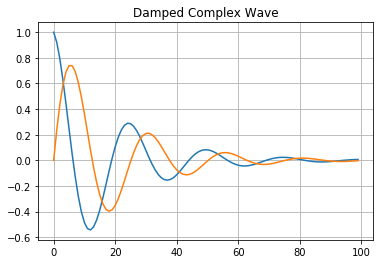

In [5]:
plt.plot(sig_in.real)
plt.plot(sig_in.imag)
plt.title('Damped Complex Wave')
plt.grid(True)

Ok let's calculate the magnitude response of y[n] = 0.0605x[n]+0.121x[n-1]+0.0605x[n-2]+1.194y[n-1]-0.436y[n-2]

In [6]:
def Numerator(w):
    return 0.0605+0.121*np.cos(w)+0.0605*np.cos(2*w)-1j*(0.121*np.sin(w) + 0.0605*np.sin(2*w))

In [7]:
def Denonimator(w):
    return 1 - 1.194*np.cos(w) + 0.436*np.cos(2*w) - 1j*(1.194*np.sin(w) - 0.436*np.sin(2*w))

In [86]:
N = 512
w = np.linspace(-np.pi, np.pi, N)

In [87]:
mag_response = np.zeros(N)
phase_response = np.zeros(N)
num = np.zeros(N, complex)
den = np.zeros(N, complex)
for x,freq in enumerate(w):
    mag_response[x] = np.abs(Numerator(freq)) / np.abs(Denonimator(freq))
    phase_response[x] =np.angle(Numerator(freq)) - np.angle(Denonimator(freq))
    num[x] = Numerator(freq)
    den[x] = Denonimator(freq)


Text(0.5,1,'Calculated Phase')

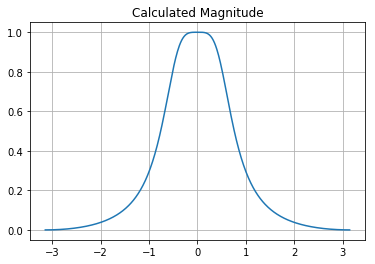

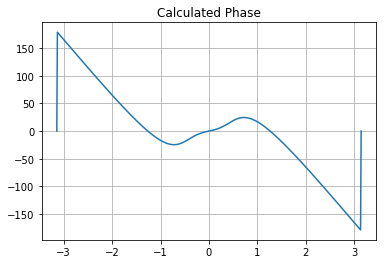

In [88]:
plt.plot(w,mag_response)
plt.title('Calculated Magnitude')
plt.grid(True)
plt.figure()
plt.plot(w,np.unwrap(phase_response)*180/np.pi)
plt.grid(True)
plt.title('Calculated Phase')

Let's figure it out the python way

In [89]:
b = np.array([0.0605,0.121,0.0605])
a = np.array([1, -1.194, 0.436])
a# = np.array([-0.436, 1.194, 1])

array([ 1.   , -1.194,  0.436])

In [90]:
w,h = signal.freqz(b,a,whole=True)

Text(0.5,1,'Freqz phase')

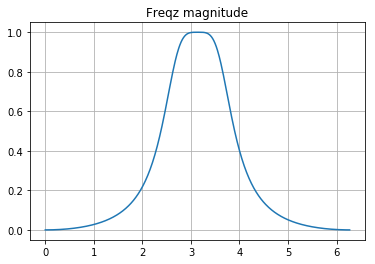

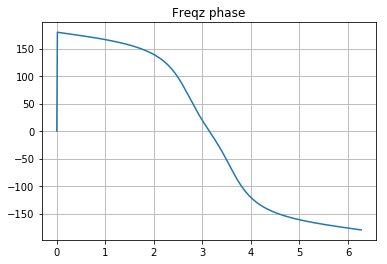

In [91]:
plt.plot(w,np.abs(fftpack.fftshift(h)))
plt.title('Freqz magnitude')
plt.grid(True)
plt.figure()
plt.plot(w,180/np.pi*np.unwrap(fftpack.fftshift(np.angle(h))))
plt.grid(True)
plt.title('Freqz phase')

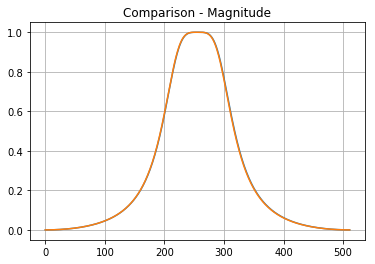

In [92]:
plt.plot(np.abs(fftpack.fftshift(h)))
plt.plot(np.abs(mag_response))
plt.title('Comparison - Magnitude')
plt.grid(True)

In [96]:
h_shifted = fftpack.fftshift(h)

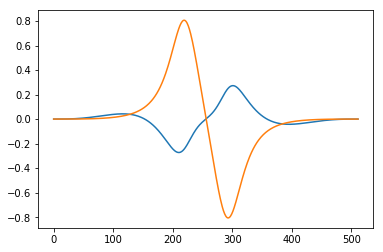

In [97]:
h2 = num/den

plt.plot(h2.imag)
plt.plot(h_shifted.imag)

In [102]:
h2[100]

(0.025153760172460016+0.03830600891615641j)

In [103]:
h_shifted[100]

(-0.04346849885540734+0.01375817980353116j)